In [ ]:
# u/ dataframe
import pandas as pd
import numpy as np

# u/ split data
from sklearn.model_selection import train_test_split

# u/ preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

# u/ visualisasi plot
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv', encoding= 'unicode_escape')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,CÃ´te D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [ ]:
## Drop Kolom

df.drop(['City','Latitude','Longitude'], axis=1, inplace=True)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1849-01-01,26.704,1.435,CÃ´te D'Ivoire
1,1849-02-01,27.434,1.362,CÃ´te D'Ivoire
2,1849-03-01,28.101,1.612,CÃ´te D'Ivoire
3,1849-04-01,26.140,1.387,CÃ´te D'Ivoire
4,1849-05-01,25.427,1.200,CÃ´te D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [ ]:
## Mengambil data dari tahun 1890 - 2013

df['dt'] = pd.to_datetime(df['dt'])  
get_data = (df['dt'] > '1890-01-01') & (df['dt'] <= '2013-09-01')
df.loc[get_data]

df = df.loc[get_data]
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
493,1890-02-01,26.912,1.273,CÃ´te D'Ivoire
494,1890-03-01,26.442,2.005,CÃ´te D'Ivoire
495,1890-04-01,25.694,1.622,CÃ´te D'Ivoire
496,1890-05-01,25.011,1.659,CÃ´te D'Ivoire
497,1890-06-01,23.592,1.102,CÃ´te D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [ ]:
## Mengambil data milik negara China

df = df.loc[df['Country'].isin(['China'])]
display(df)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
47872,1890-02-01,-11.360,1.639,China
47873,1890-03-01,-3.132,1.426,China
47874,1890-04-01,6.392,1.215,China
47875,1890-05-01,15.635,1.198,China
47876,1890-06-01,20.119,0.543,China
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [ ]:
## Reset Index dataframe dan drop kolom country

df.drop(['Country'], axis=1, inplace=True)
df.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dt,AverageTemperature,AverageTemperatureUncertainty
0,1890-02-01,-11.360,1.639
1,1890-03-01,-3.132,1.426
2,1890-04-01,6.392,1.215
3,1890-05-01,15.635,1.198
4,1890-06-01,20.119,0.543
...,...,...,...
23739,2013-05-01,18.979,0.807
23740,2013-06-01,23.522,0.647
23741,2013-07-01,25.251,1.042
23742,2013-08-01,24.528,0.840


In [ ]:
## Mengecek nilai null / nan

df.isnull().sum()

dt                                0
AverageTemperature               16
AverageTemperatureUncertainty    16
dtype: int64

In [ ]:
## Drop baris yg memiliki nilai null / nan

df.dropna(subset=['AverageTemperature'],inplace=True)
df.dropna(subset=['AverageTemperatureUncertainty'],inplace=True)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

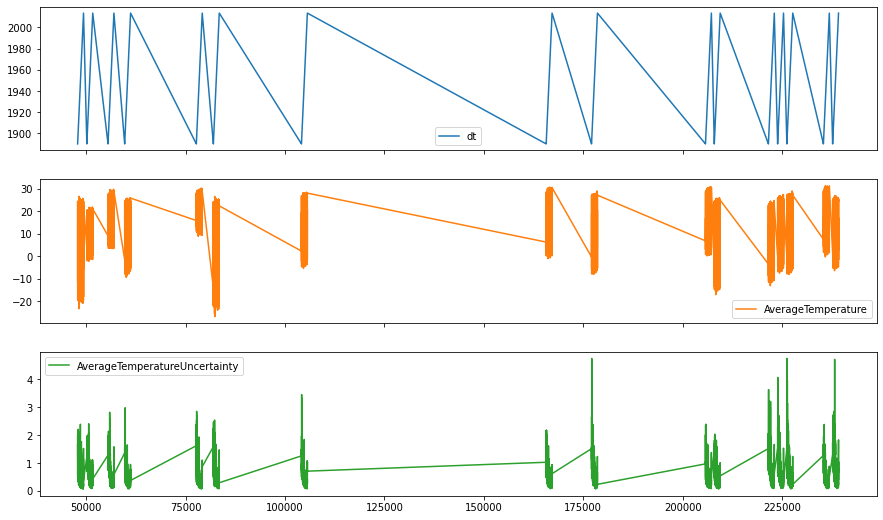

In [ ]:
## Plot tiap kolom

df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots=True, figsize=(15, 9))
plt.show()

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
dtype: object

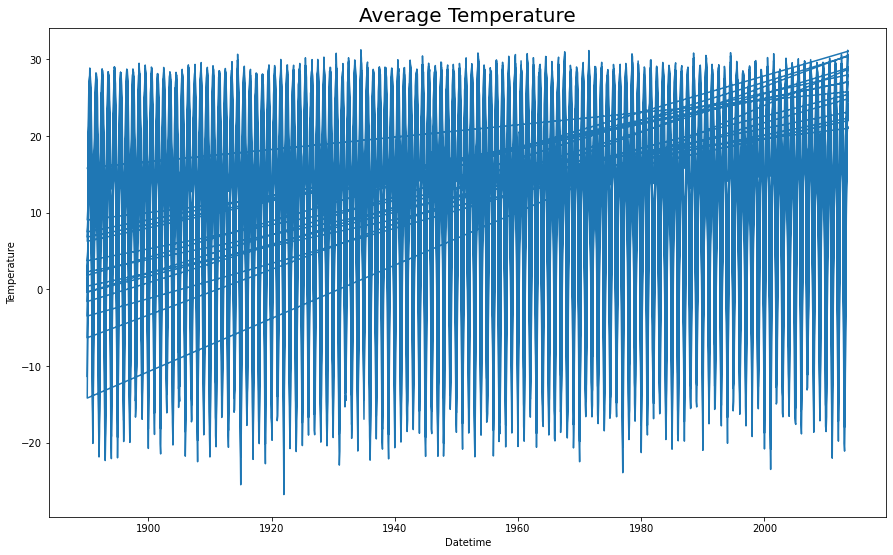

In [ ]:
## Plot dates dan Average temperature"""

dates = df['dt'].values
temp = df['AverageTemperature'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize=(15,9))
plt.plot(dates, temp)

plt.title('Average Temperature', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

df.dtypes

In [ ]:
## Split Dataset

x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size=0.8, test_size = 0.2, shuffle = False )

In [ ]:
## Total data train (80%) dan validation (20%)

print('Total Data Train : ',len(x_train))
print('Total Data Validation : ',len(x_valid))

Total Data Train :  18982
Total Data Validation :  4746


In [ ]:
## Merubah data u/ dapat diterima model

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [ ]:
## Pemodelan Sequential

tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [ ]:
## Menghitung nilai 10% MAE u/ penerapan callback

Mae = (df['AverageTemperature'].max() - df['AverageTemperature'].min()) * 10/100
print(Mae)

5.8004999999999995


In [ ]:
"""Penggunaan Callback <10% MAE"""

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<2.4 and logs.get('val_mae')<2.4):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
## Penggunaan learning rate SGD untuk optimizer

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
      6/Unknown - 13s 154ms/step - loss: 12.3463 - mae: 12.8428

95/95 [==============================] - 29s 177ms/step - loss: 13.1792 - mae: 13.6735 - val_loss: 12.2665 - val_mae: 12.7615
Epoch 2/100
95/95 [==============================] - 16s 161ms/step - loss: 11.7482 - mae: 12.2403 - val_loss: 10.3678 - val_mae: 10.8554
Epoch 3/100
95/95 [==============================] - 16s 160ms/step - loss: 9.9036 - mae: 10.3952 - val_loss: 8.5665 - val_mae: 9.0561
Epoch 4/100
95/95 [==============================] - 16s 162ms/step - loss: 8.5752 - mae: 9.0666 - val_loss: 7.9470 - val_mae: 8.4416
Epoch 5/100
95/95 [==============================] - 16s 162ms/step - loss: 8.1290 - mae: 8.6189 - val_loss: 7.7113 - val_mae: 8.2023
Epoch 6/100
95/95 [==============================] - 16s 162ms/step - loss: 7.8935 - mae: 8.3846 - val_loss: 7.4184 - val_mae: 7.9058
Epoch 7/100
95/95 [==============================] - 16s 162ms/step - loss: 7.6081 - mae: 8.1007 - val_loss: 7.0941 - val_mae: 7.5821
Epoch 8/100
95/95 [==============================] - 15s 161ms/st

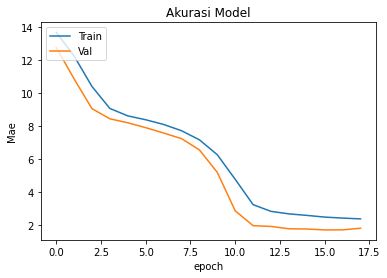

In [ ]:
# Plot Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

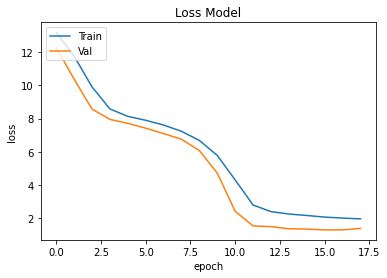

In [ ]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()